In [20]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
from tqdm import tqdm
import emcee
import corner
import plotly.express as px
import plotly.graph_objects as go
import re
import glob


%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 12,8
rcParams['axes.formatter.useoffset'] = False

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
from code import stats, utils
from code.outlier_detection import non_parametric
from code.fitting import analytical

df = code.utils.load_data("./data/ORIGINALS/ETD_Wasp-12_og.txt")

In [289]:
def log_likelihood(df, errors, beta):
    N = len(df)
    X = np.vstack(
        [
            np.power(df.epoch, 0.0),
            np.power(df.epoch, 1.0),
            0.5 * np.power(df.epoch, 2.0),
        ]
    ).T
    y = np.atleast_2d(df.transit_time.values).T
    inv_sigma = np.diag(1 / np.power(errors, 2))
    
    y_hat = X @ beta
    residuals = y - y_hat
    log_likelihood = (
        -(0.5 * N * np.log(2 * np.pi))
        - (np.sum(np.log(errors)))
        - (0.5 * residuals.T @ inv_sigma @ residuals)
    )
    return log_likelihood.item()

def bic(df, errors, beta, k):
    n = len(df)
    return k*np.log(n) - 2*log_likelihood(df, errors, beta)

In [290]:
survivors, outliers = non_parametric.non_parametric_with_error(df, threshold=1e-6)
beta, *_, posterior_observation_covariance = analytical.bayesian_mvn_regression_fit(survivors)
residuals = stats.compute_residuals(survivors, beta)
errors = np.power(np.diag(posterior_observation_covariance), 0.5)
normalised_residuals = residuals / errors
sp.stats.normaltest(normalised_residuals)
bic(survivors, errors, beta, k=len(df)+3)

# X2 = np.power(residuals / errors, 2.0).sum()
# chi_dist = sp.stats.chi2(df=len(df)-257)
# chi_dist.cdf(X), chi_dist.sf(X)


E[dP/dE] = -4.3977532217558706e-10 ms/epoch SD[dP/dE] = 1.4316120337510223e-06 Prob(dP/dE < 0) = 0.5001229919079341


904.7189352092316

In [293]:
survivors, outliers = non_parametric.non_parametric_with_error(df, threshold=1e-6)
beta, *_ = numerical.ml_fit(df)
residuals = stats.compute_residuals(df, beta)
normalised_residuals = residuals / df.error
sp.stats.normaltest(normalised_residuals)
bic(survivors, survivors.error, beta, k=3)


# X2 = np.power(residuals / df.error, 2.0).sum()
# chi_dist = sp.stats.chi2(df=len(df)-3)
# chi_dist.cdf(X), chi_dist.sf(X)


66046.61358163308

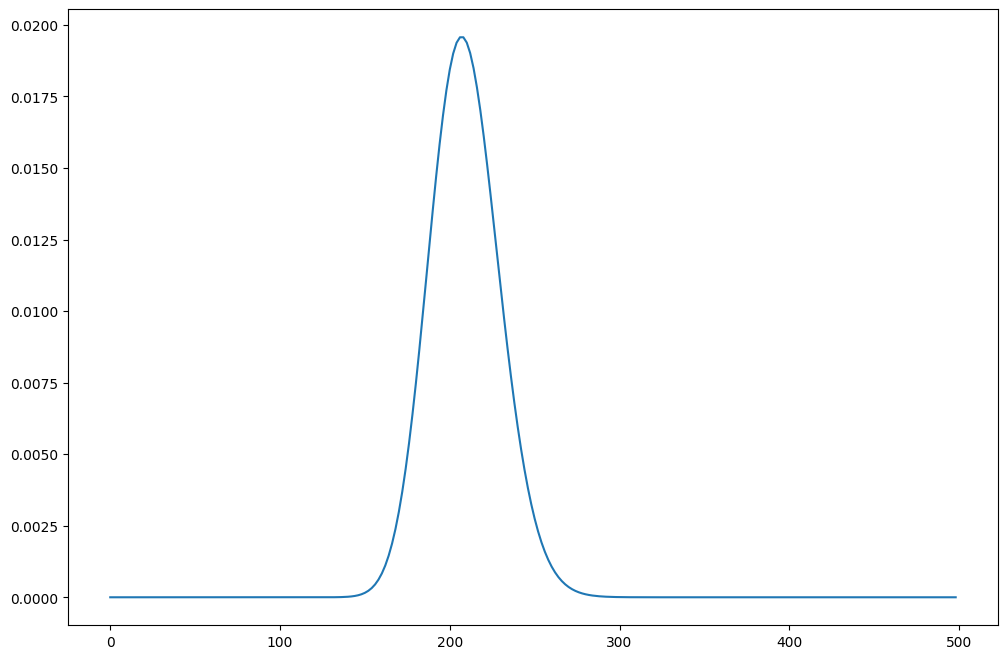

In [250]:
X = np.arange(0, 500, 2)
plt.plot(X, sp.stats.chi2(df=len(survivors)).pdf(X))

In [32]:
kernel = sp.stats.gaussian_kde(np.vstack([df.epoch, df.transit_time]))

In [33]:
xmin = df.epoch.min()
xmax = df.epoch.max()
ymin = df.transit_time.min()
ymax = df.transit_time.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

In [34]:
Z = np.reshape(kernel(positions).T, X.shape)

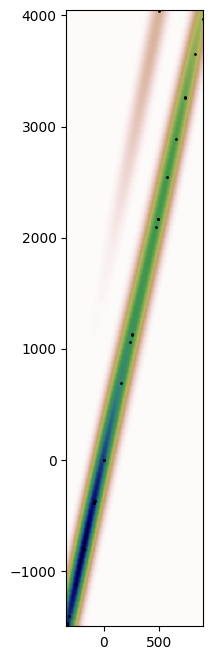

In [36]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(df.epoch, df.transit_time, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [128]:
ecdf = ECDF(np.array([[1], [2], [3]]))
ecdf

ValueError: x and y do not have the same shape

In [136]:
sp.stats.norm.fit([1,2,3])

(2.0, 0.816496580927726)

,index,epoch,transit_time,error,data_quality,observer
0,1,-2050.0,-2237.40865,0.00020,1,Hebb et al 2008
1,2,-1750.0,-1909.98215,0.00060,2,Hentunen
3,5,-1746.0,-1905.61694,0.00047,1,Tucker et al. 2011
4,6,-1746.0,-1905.61435,0.00100,3,Gary
8,14,-1475.0,-1609.84153,0.00066,3,"Kornos L., Veres P."
11,18,-1442.0,-1573.82372,0.00044,1,Tucker et al. 2011
12,19,-1442.0,-1573.82275,0.00014,1,Ingemyr M.
15,23,-1389.0,-1515.97802,0.00011,1,Maciejewski et al. 2011
16,25,-1367.0,-1491.96588,0.00014,1,Maciejewski et al. 2011
23,34,-1112.0,-1213.65556,0.00035,1,Irwin S.


In [122]:
import statsmodels as sm 

sm.distributions.empirical_distribution

<module 'statsmodels.distributions.empirical_distribution' from '/usr/local/lib/python3.8/site-packages/statsmodels/distributions/empirical_distribution.py'>

In [ ]:
from code.fitting import numerical

beta = numerical.mcmc_fit(df)

100%|██████████████████████████████████████| 5000/5000 [00:17<00:00, 279.47it/s]


In [97]:
from code.fitting import analytical

analytical.bayesian_mvn_regression_fit(df)

E[dP/dE] = -7.044640345021537e-10 ms/epoch SD[dP/dE] = 6.803846843420947e-07 Prob(dP/dE < 0) = 0.5004142698503244


(array([[ 3.57737792e-03],
        [ 1.09141980e+00],
        [-8.15351892e-18]]),
 array([[ 3.74853622e-09,  6.71720060e-13, -2.47240903e-15],
        [ 6.71720060e-13,  9.67242112e-16, -6.73162655e-19],
        [-5.48347660e-23, -1.49298584e-26,  6.15321135e-29]]),
 array([[4.0000e-08, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 3.6000e-07, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.4336e-06, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.2996e-06, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.2321e-06,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         2.9160e-07]]),
 array([[ 4.11500379e-08,  8.70681436e-10,  1.24576951e-09, ...,
         -8.26818757e-10,  1.35813969e-09,  1.39685025e-09],
        [ 8.706